In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import qdatoolkit as qda

data = pd.read_csv('./data/layer_324.csv')

data.head()

,t,x,y,z,layer_id,sensor0,sensor1,temp,track_id,track_orient,pos_rel,t_rel
0,127300340.0,26.035,-66.386,12.96,324,800.0,795.0,1594.7,0,131,0.00000,0.0
1,127300350.0,26.043,-66.392,12.96,324,798.0,794.0,1593.3,0,131,0.00821,10.0
2,127300360.0,26.047,-66.398,12.96,324,814.0,799.0,1608.5,0,131,0.01642,20.0
3,127300370.0,26.049,-66.404,12.96,324,829.0,806.0,1619.4,0,131,0.02463,30.0
4,127300380.0,26.057,-66.412,12.96,324,833.0,824.0,1599.8,0,131,0.03284,40.0


Runs test statistic = -227.133
Runs test p-value = 0.000



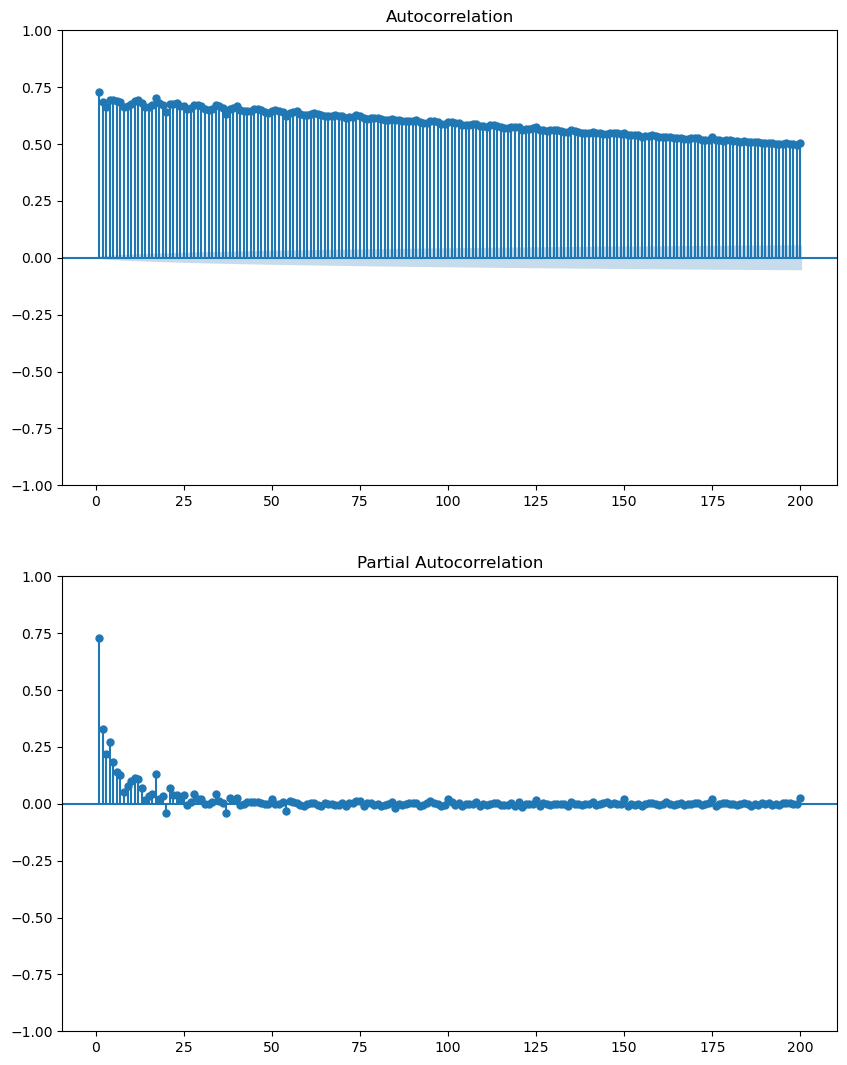

(-227.13295162929526, 0.0)


In [3]:

# Perform the runs test for independence on the 'temp' column
result = qda.Assumptions(data['temp']).independence()

# Display the result
print(result)

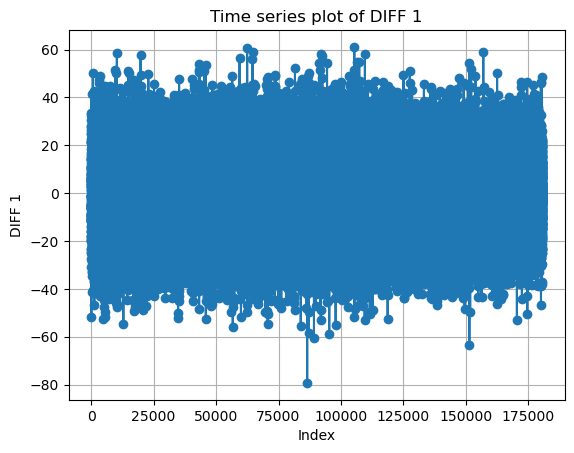

In [4]:
data['diff1'] = data['temp'].diff(1)

plt.plot(data['diff1'], 'o-')
plt.xlabel('Index')
plt.ylabel('DIFF 1')
plt.title('Time series plot of DIFF 1')
plt.grid()
plt.show()

Runs test statistic = 116.596
Runs test p-value = 0.000



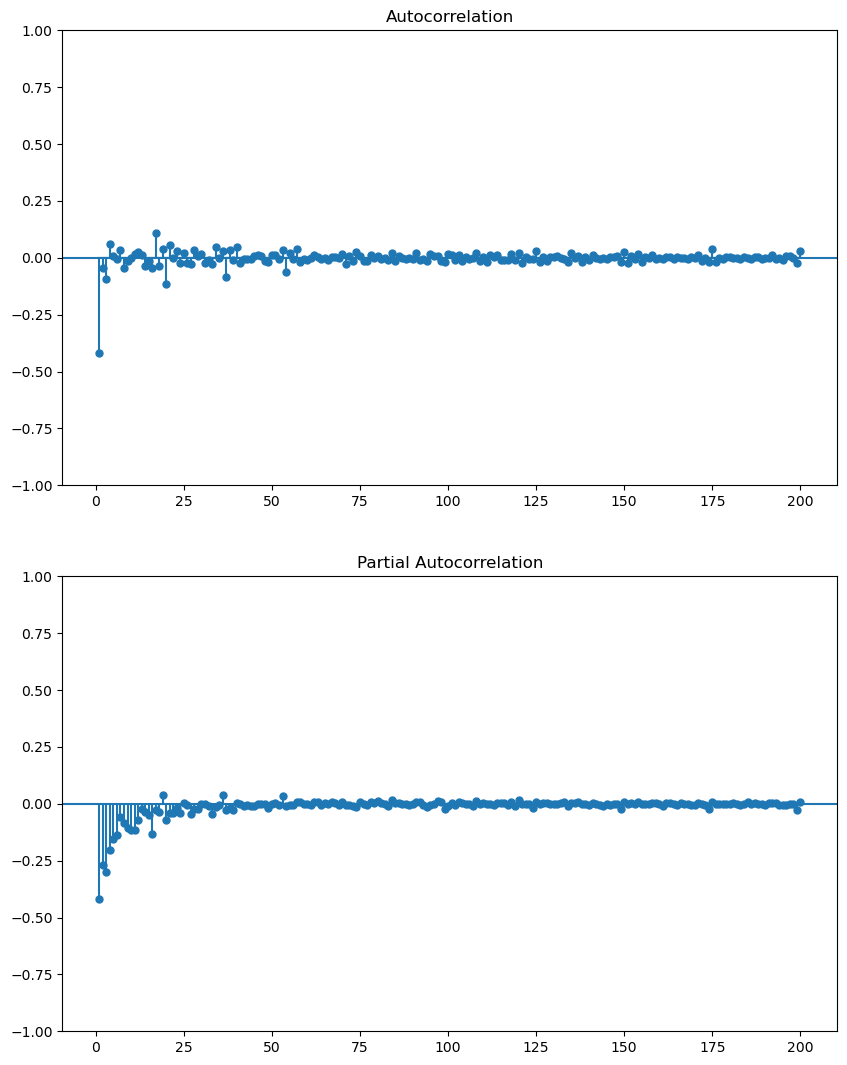

In [6]:
_ = qda.Assumptions(data['diff1']).independence()

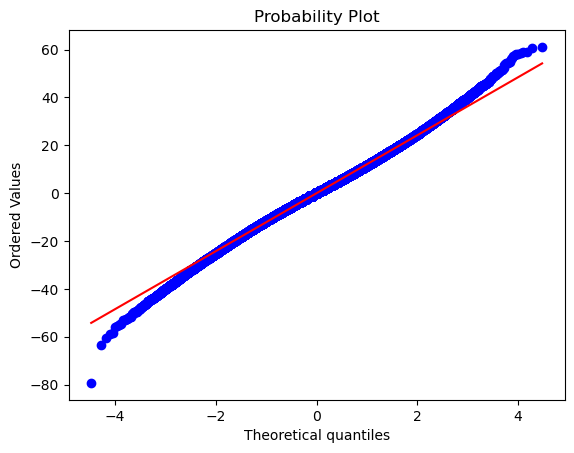

Shapiro-wilk test statistic = 0.998
Shapiro-wilk test p-value = 0.000


/opt/anaconda3/envs/qda/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [7]:
_ = qda.Assumptions(data['diff1']).normality()

In [8]:
# fit model ARIMA with constant term
model = qda.ARIMA(data['temp'], order=(0,1,1), add_constant=True)

qda.ARIMAsummary(model)

---------------------
ARIMA MODEL RESULTS
---------------------
ARIMA model order: p=0, d=1, q=1

FINAL ESTIMATES OF PARAMETERS
-------------------------------
 Term    Coef  SE Coef    T-Value  P-Value
const -0.0004   0.0018    -0.2074   0.8357
ma.L1 -0.9201   0.0009 -1037.8275   0.0000

RESIDUAL SUM OF SQUARES
-------------------------
      DF         SS     MS
180535.0 1.6250e+07 90.012

Ljung-Box Chi-Square Statistics
----------------------------------
 Lag  Chi-Square  P-Value
  12   5782.0568      0.0
  24  10229.7852      0.0
  36  11799.2188      0.0
  48  13521.9410      0.0


In [9]:
# fit model ARIMA with constant term
model = qda.ARIMA(data['temp'], order=(0,1,1), add_constant=False)

qda.ARIMAsummary(model)

---------------------
ARIMA MODEL RESULTS
---------------------
ARIMA model order: p=0, d=1, q=1

FINAL ESTIMATES OF PARAMETERS
-------------------------------
 Term    Coef  SE Coef    T-Value  P-Value
ma.L1 -0.9201   0.0009 -1037.9256      0.0

RESIDUAL SUM OF SQUARES
-------------------------
      DF         SS      MS
180536.0 1.6250e+07 90.0115

Ljung-Box Chi-Square Statistics
----------------------------------
 Lag  Chi-Square  P-Value
  12   5782.0754      0.0
  24  10229.8510      0.0
  36  11799.2959      0.0
  48  13522.0325      0.0


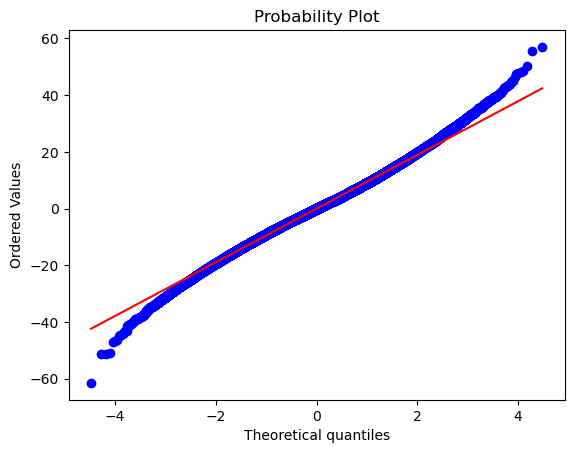

Shapiro-wilk test statistic = 0.997
Shapiro-wilk test p-value = 0.000


/opt/anaconda3/envs/qda/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [10]:
#extract the residuals
residuals = model.resid[1:] 

# Perform the Shapiro-Wilk test
_ = qda.Assumptions(residuals).normality()

Runs test statistic = -32.771
Runs test p-value = 0.000



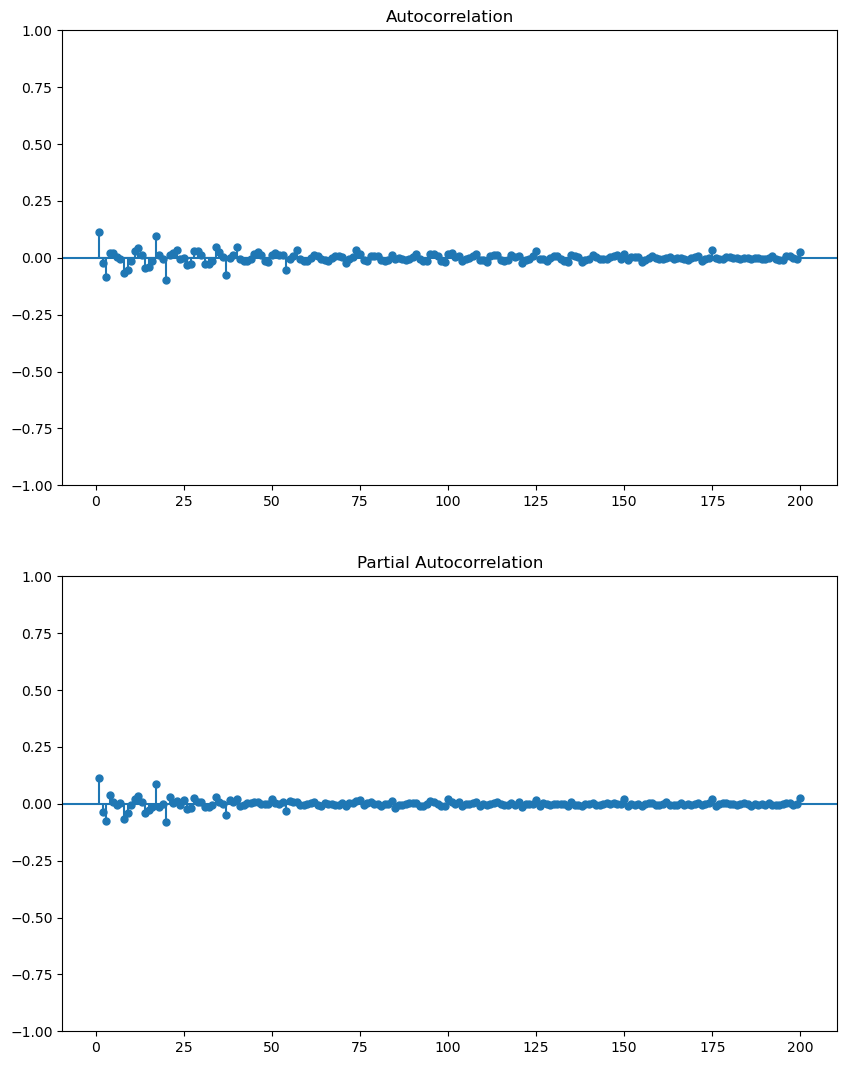

In [11]:
_ = qda.Assumptions(residuals).independence()

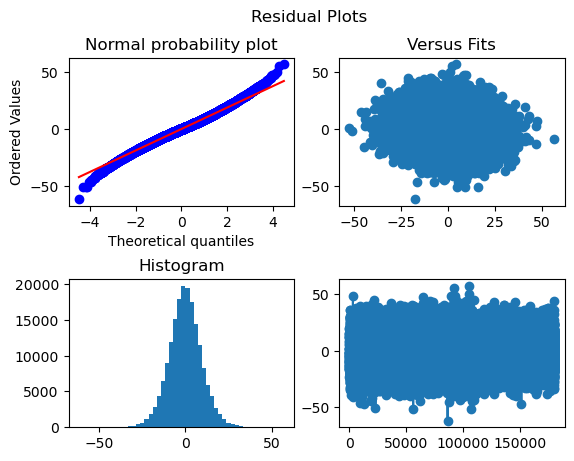

In [12]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Residual Plots')
stats.probplot(residuals, dist="norm", plot=axs[0,0])
axs[0,0].set_title('Normal probability plot')
axs[0,1].scatter(model.fittedvalues[1:], model.resid[1:])
axs[0,1].set_title('Versus Fits')
fig.subplots_adjust(hspace=0.5)
axs[1,0].hist(residuals, bins=50)
axs[1,0].set_title('Histogram')
axs[1,1].plot(np.arange(1, len(residuals)+1), residuals, 'o-')
plt.show()

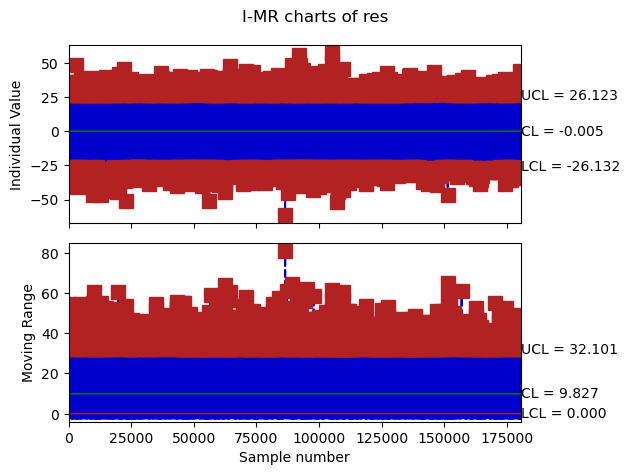

In [13]:
# Put the residuals in a dataframe
df_SCC = pd.DataFrame(model.resid, columns=['res'])

# Plot the IMR control chart
df_SCC_IMR = qda.ControlCharts.IMR(df_SCC, 'res')

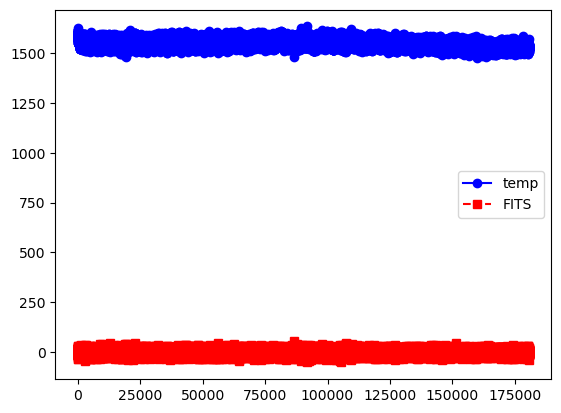

In [15]:
plt.plot(data['temp'], color='b', linestyle='-', marker='o', label='temp')
plt.plot(model.fittedvalues, color='r', linestyle='--', marker='s', label='FITS')
plt.legend()
plt.show()

In [61]:
data2 = model.fittedvalues

data2.head()

0       NaN
1    0.0000
2    4.1778
3    1.6235
4    7.2444
dtype: float64